<a href="https://colab.research.google.com/github/INA-95/retail_customer_behavior_analysis/blob/main/walmart_customer_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
# library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
file_path = "/content/drive/MyDrive/Side_Project/side_project/Walmart/walmart_data.csv"
df = pd.read_csv(file_path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [54]:
# Meaning of every single row

# User_ID
## Every user made a multiple purchase

df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [55]:
# Product_ID
# Is there any user who made a purchase same product?

for user_id, sub in df.groupby('User_ID'):
    cnt_purchase = sub.groupby('Product_ID')['Product_ID'].count().rename_axis('product_id').reset_index()
    cnt_purchase = cnt_purchase.rename(columns = {'Product_ID' : 'num_of_purchase'})
    for val in cnt_purchase['num_of_purchase']:
        if val > 1:
            print(cnt_purchase['product_id'])
print('No one bought a same product')

No one bought a same product


In [ ]:
# Every product was sold at least one time

for product_id, sub in df.groupby('Product_ID'):
    print(product_id, ":", sub['User_ID'].count())

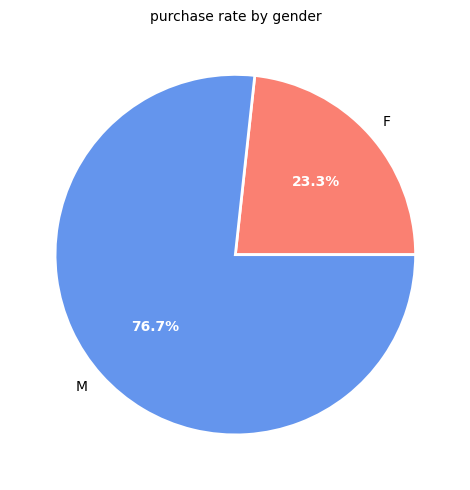

In [89]:
gender_purchase = df.groupby('Gender')['Purchase'].sum().reset_index()
gender_purchase

genders = [gender for gender in gender_purchase['Gender']]
purchase_amt = [amt for amt in gender_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
colors = ['salmon', 'cornflowerblue']

patches, texts, pcts = ax.pie(
    purchase_amt, labels = genders, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'},
    colors = colors)

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('purchase rate by gender', fontsize = '10')
plt.tight_layout()

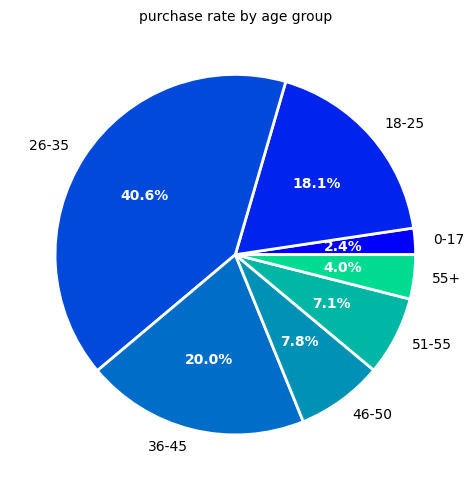

In [84]:
m_df = df[df['Gender'] == 'M']
age_purchase = m_df.groupby('Age')['Purchase'].sum().reset_index()
ages = [age for age in age_purchase['Age']]
purchase_amt = [amt for amt in age_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
theme = plt.get_cmap('winter')
ax.set_prop_cycle("color", [theme(1. * i / len(ages)) for i in range(len(ages))])

patches, texts, pcts = ax.pie(
    purchase_amt, labels = ages, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'})

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('purchase rate by age group', fontsize = '10')
plt.tight_layout()

In [29]:
# Popular product by age group

# 26-35
purchase_26_35 = m_df[m_df['Age'] == '26-35'].groupby('Product_ID')['Purchase'].sum().reset_index()
purchase_26_35 = purchase_26_35.sort_values(by = 'Purchase', ascending = False)[:10].reset_index()
purchase_26_35[['Product_ID', 'Purchase']]

,Product_ID,Purchase
0,P00025442,8605328
1,P00110742,8488003
2,P00184942,7936977
3,P00237542,7864700
4,P00057642,7728454
5,P00112142,7491531
6,P00110942,7462648
7,P00255842,7455002
8,P00028842,7339219
9,P00059442,7224104


[Text(0.5, 1.0, 'Purchase rate by Occupation')]

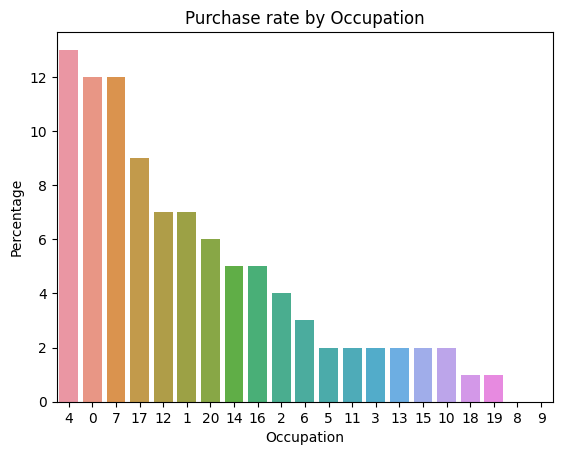

In [133]:
# How's the men's purchase distribution by occupation?

occu_purchase = m_df.groupby('Occupation')['Purchase'].sum().reset_index()
occu_purchase['Percentage'] = round((occu_purchase['Purchase'] / occu_purchase['Purchase'].sum()) * 100, 0)

occu_purchase.sort_values('Percentage')

sns.barplot(x = 'Occupation', y = 'Percentage', data = occu_purchase,
            order = occu_purchase.sort_values('Percentage', ascending = False).Occupation).set(title = 'Purchase rate by Occupation')

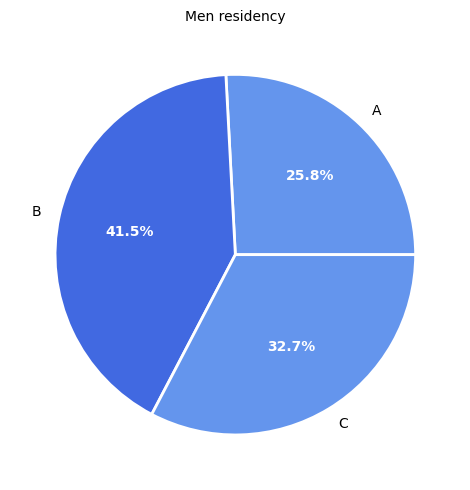

In [141]:
# Where does men live?

city_purchase = m_df.groupby('City_Category')['Purchase'].sum().reset_index()
citys = [city for city in city_purchase['City_Category']]
amt = [amt for amt in city_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
colors = ['cornflowerblue', 'royalblue']

patches, texts, pcts = ax.pie(
    amt, labels = citys, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'},
    colors = colors)

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('Men residency', fontsize = '10')
plt.tight_layout()

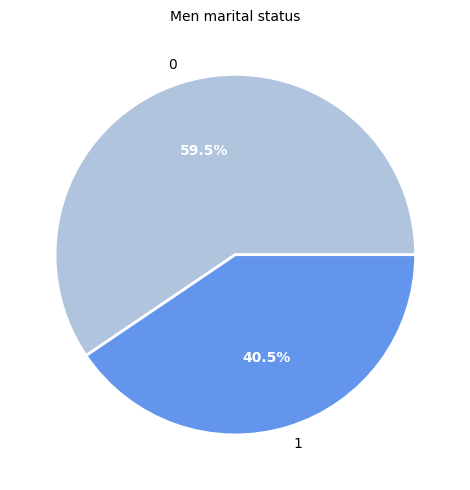

In [139]:
# Do men get married?

marital_purchase = m_df.groupby('Marital_Status')['Purchase'].sum().reset_index()
marital = [val for val in marital_purchase['Marital_Status']]
amt = [amt for amt in marital_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
colors = ['lightsteelblue', 'cornflowerblue']

patches, texts, pcts = ax.pie(
    amt, labels = marital, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'},
    colors = colors)

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('Men marital status', fontsize = '10')
plt.tight_layout()